In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df_train = pd.read_csv('../input/titanic/train.csv')
df_test = pd.read_csv('../input/titanic/test.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df_train.shape

(891, 12)

In [6]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
# \t 공백, \n 줄바꿈
# :> 오른쪽 정렬, :< 왼쪽 정렬, : 정렬 안 함, :. 소수점
for col in df_train.columns:
    msg = 'column:{:>10}\t Percent of NaN value:{:.2f}%'.format(col,100*(df_train[col].isnull().sum()/df_train[col].shape[0]))
    print(msg)

column:PassengerId	 Percent of NaN value:0.00%
column:  Survived	 Percent of NaN value:0.00%
column:    Pclass	 Percent of NaN value:0.00%
column:      Name	 Percent of NaN value:0.00%
column:       Sex	 Percent of NaN value:0.00%
column:       Age	 Percent of NaN value:19.87%
column:     SibSp	 Percent of NaN value:0.00%
column:     Parch	 Percent of NaN value:0.00%
column:    Ticket	 Percent of NaN value:0.00%
column:      Fare	 Percent of NaN value:0.00%
column:     Cabin	 Percent of NaN value:77.10%
column:  Embarked	 Percent of NaN value:0.22%


In [8]:
# shape[0] : 행 반환, shape[1] : 열 반환
df_train[col].shape[0]

891

In [9]:
col

'Embarked'

In [10]:
df_train[col]

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [11]:
type(df_train[col])

pandas.core.series.Series

In [12]:
df_train[col].isnull().sum()

2

In [13]:
round(df_train[col].isnull().sum()/df_train[col].shape[0],4)

0.0022

In [14]:
df_train.iloc[:,:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


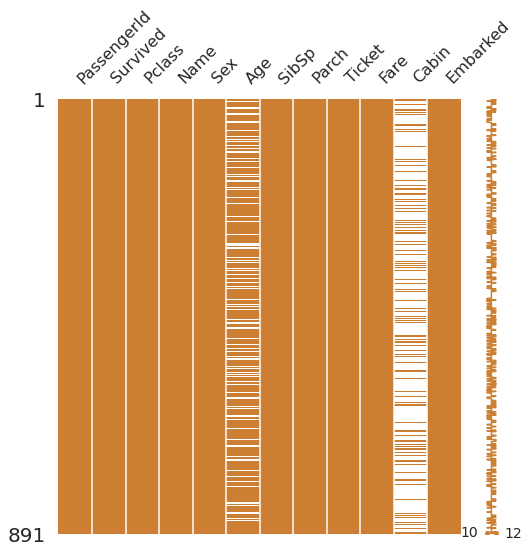

In [15]:
msno.matrix(df=df_train.iloc[:,:],figsize=(8,8),color=(0.8,0.5,0.2))

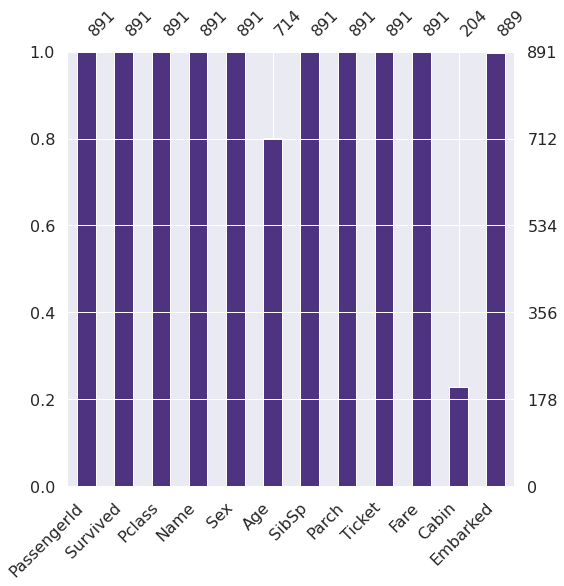

In [16]:
msno.bar(df=df_train.iloc[:,:],figsize=(8,8),color=(0.3,0.2,0.5))

In [17]:
df_train['Survived'].count

<bound method Series.count of 0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64>

In [18]:
df_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

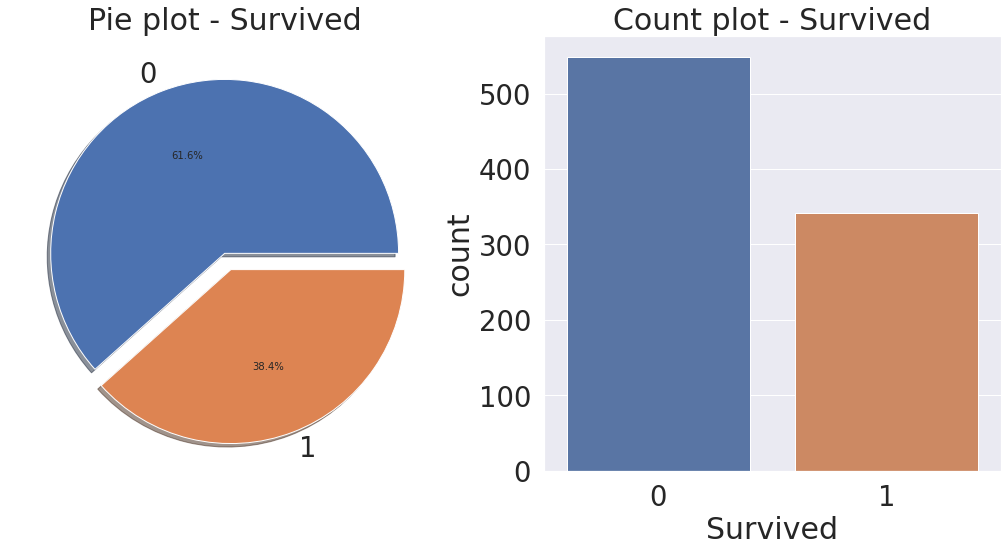

In [19]:
f, ax = plt.subplots(1,2,figsize=(18,8))
# explode: 파이 조각이 돌출되는 크기, 0 이면 돌출되지 않음
# autopct: 파이 조각의 전체 대비 백분율
df_train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
# countplot: 각 카테고리 값별로 데이터가 얼마나 있는지 표시
# data frame 에만 사용 가능
sns.countplot('Survived',data=df_train,ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

In [20]:
ax

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa4f062be10>,
      dtype=object)

## 2.1 Pclass

In [21]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [22]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=False).count()

,Pclass,Survived
0,1,216
1,2,184
2,3,491


In [23]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [24]:
pd.crosstab(df_train['Pclass'],df_train['Survived'],margins=True).style.background_gradient(cmap='cool')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [25]:
round(df_train[['Pclass','Survived']].groupby(['Pclass']).mean(),2)

,Survived
Pclass,
1,0.63
2,0.47
3,0.24


In [26]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).mean().sort_values(by='Survived',ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [27]:
type(df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).mean().sort_values(by='Survived',ascending=False))

pandas.core.frame.DataFrame

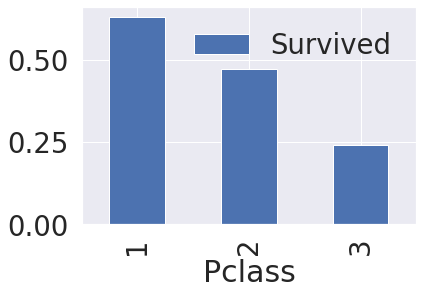

In [28]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).mean().sort_values(by='Survived',ascending=False).plot.bar()

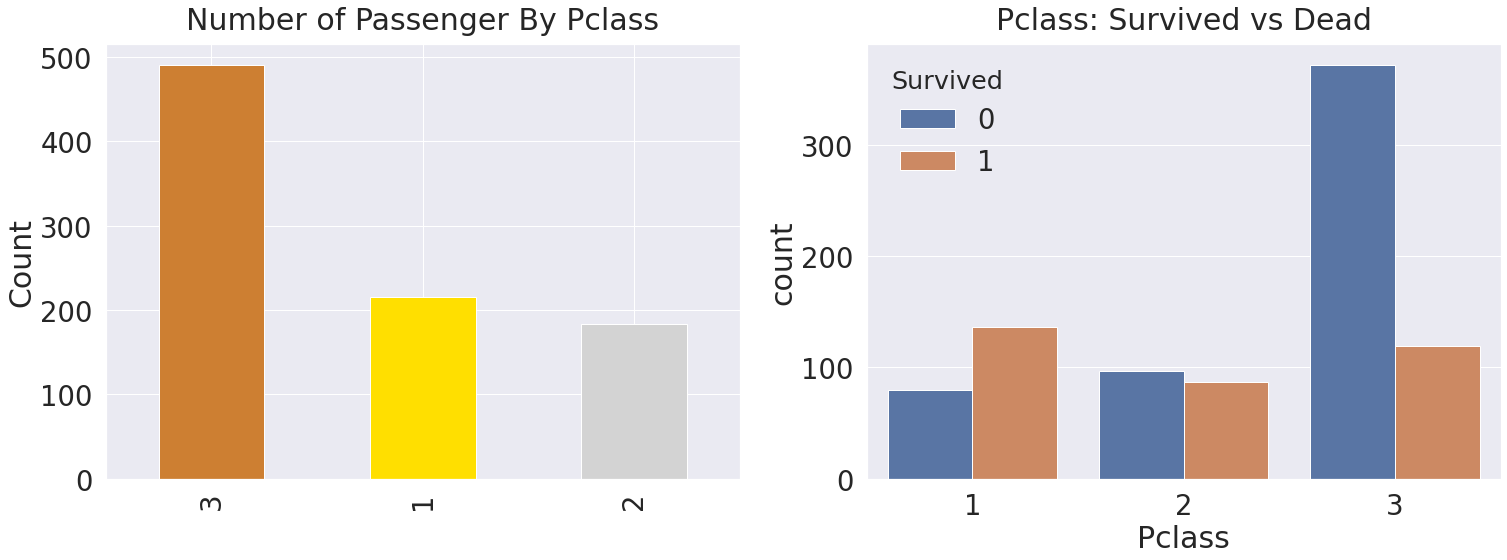

In [29]:
y_position = 1.02
f, ax = plt.subplots(1,2,figsize=(25,8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number of Passenger By Pclass',y=y_position)
ax[0].set_ylabel('Count')

# hue : 생존자, 사망자를 구분하여 반환
sns.countplot('Pclass',hue='Survived',data=df_train,ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead',y=y_position)

plt.show()

## 2.2 Sex

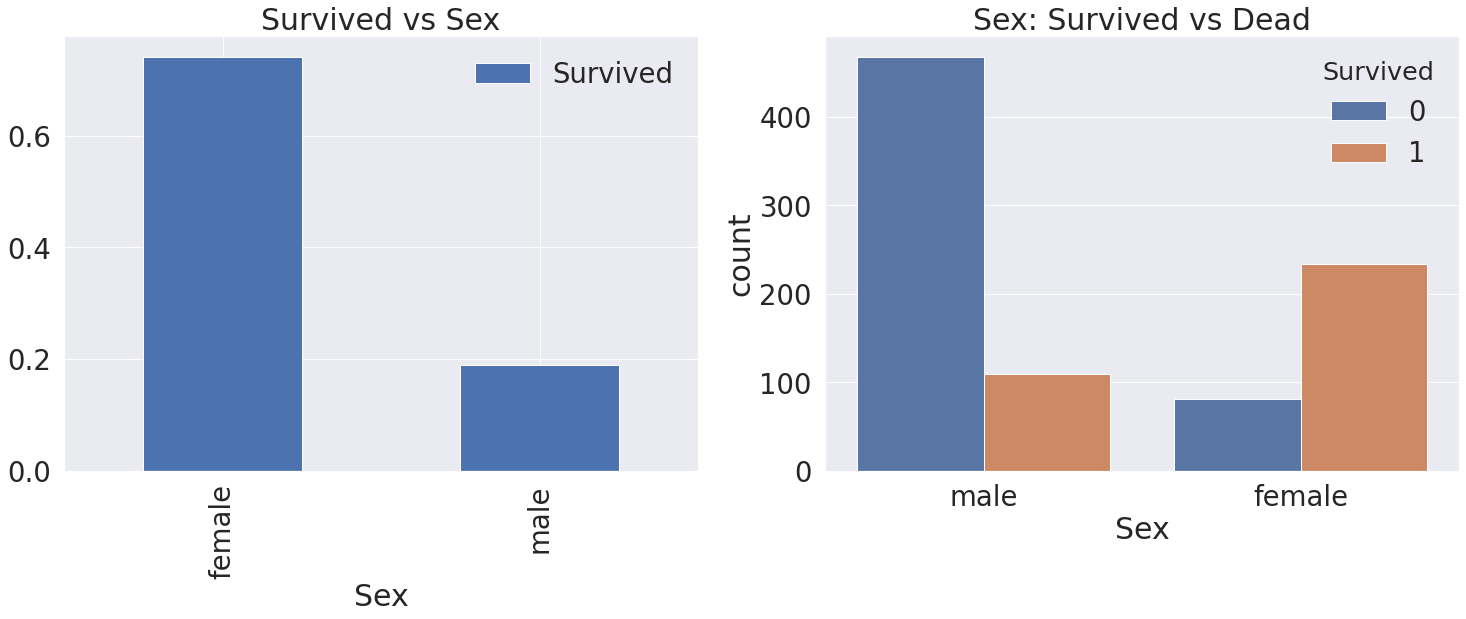

In [31]:
f, ax=plt.subplots(1,2,figsize=(25,8))
df_train[['Sex','Survived']].groupby(['Sex'],as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot('Sex',hue='Survived',data=df_train,ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')

plt.show()

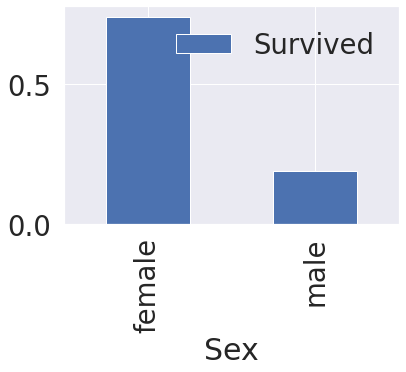

In [32]:
df_train[['Sex','Survived']].groupby(['Sex'],as_index=True).mean().plot.bar()

In [33]:
pd.crosstab(df_train['Sex'],df_train['Survived'],margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


## 2.3 Both Sex and Pclass

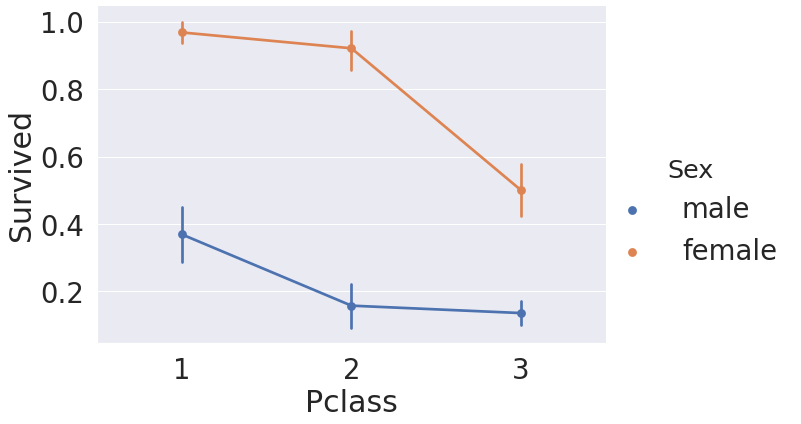

In [34]:
sns.factorplot('Pclass','Survived',hue='Sex',data=df_train, size=6, aspect=1.5)

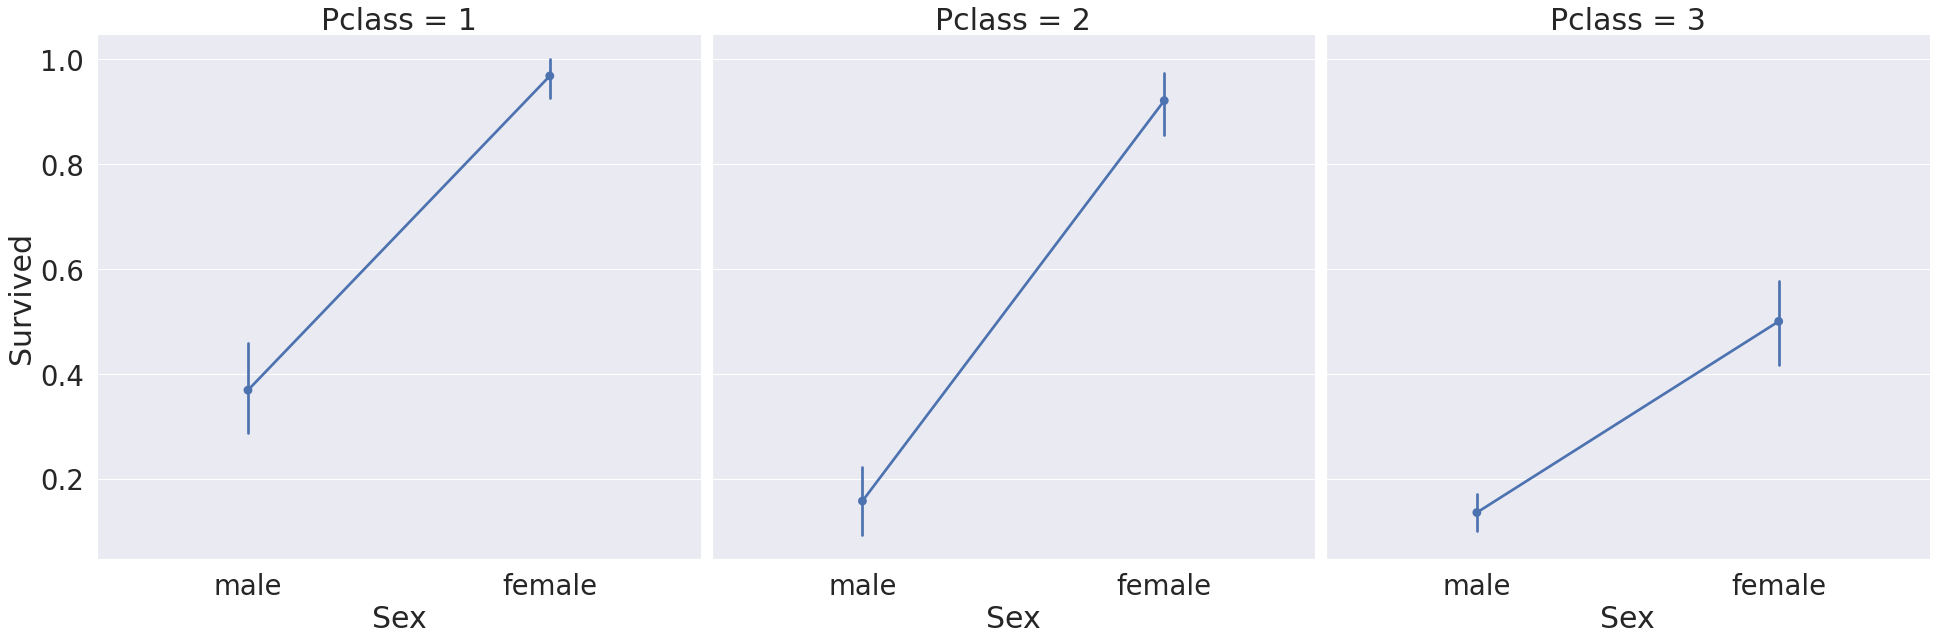

In [35]:
sns.factorplot(x='Sex',y='Survived',col='Pclass',data=df_train,saturation=.5,size=9,aspect=1)

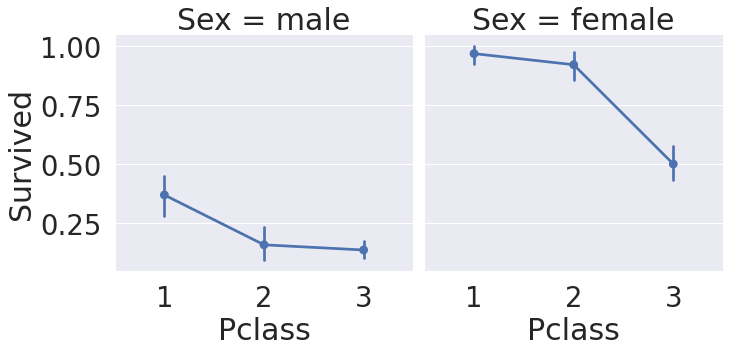

In [36]:
sns.factorplot(x='Pclass',y='Survived',col='Sex',data=df_train)

## Age

In [37]:
# 데이터 반환_방법 1
print('나이가 가장 많은 탑승객: {:.1f} years'.format(df_train['Age'].max()))

나이가 가장 많은 탑승객: 80.0 years


In [38]:
# 데이터 반환_방법 2
print('나이가 가장 많은 탑승객:', df_train['Age'].max(),'years')

나이가 가장 많은 탑승객: 80.0 years


In [39]:
# 데이터 반환_방법 3
a = df_train['Age'].max()
print(f'나이가 가장 많은 탑승객: {a} years')

나이가 가장 많은 탑승객: 80.0 years


In [40]:
var = df_train['Age']

In [41]:
# 도화지를 까는 다양한 방법
#1 f = plt.figure(figsize=(10,10))
#2 f, ax = plt.subplots(1,1,figsize=(10,10))
#3 plt.figure(figsize=(10,10))

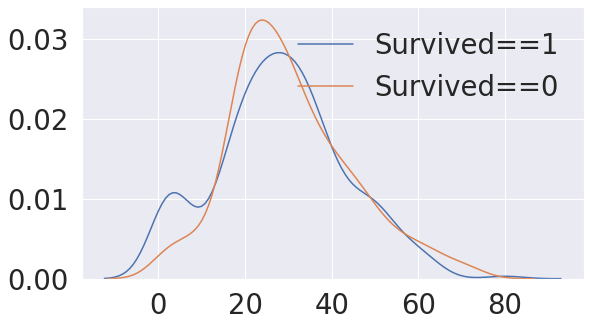

In [42]:
f, ax = plt.subplots(1,1,figsize=(9,5))
sns.kdeplot(df_train[df_train['Survived']==1]['Age'],ax=ax)
sns.kdeplot(df_train[df_train['Survived']==0]['Age'],ax=ax)
plt.legend(['Survived==1','Survived==0'])
plt.show()

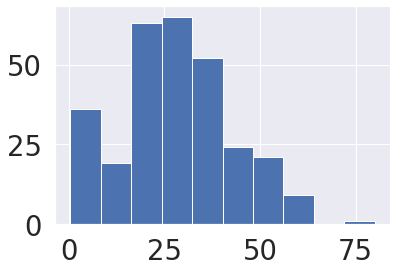

In [43]:
df_train[df_train['Survived']==1]['Age'].hist()

In [44]:
# indexing 하는 방법
#1
df_train.iloc[:,1]
#2
# iterrows는 현재 인덱스와 시리즈 정보 매칭 반복
for row in df_train.iterrows():
    break

In [45]:
row

(0,
 PassengerId                          1
 Survived                             0
 Pclass                               3
 Name           Braund, Mr. Owen Harris
 Sex                               male
 Age                                 22
 SibSp                                1
 Parch                                0
 Ticket                       A/5 21171
 Fare                              7.25
 Cabin                              NaN
 Embarked                             S
 Name: 0, dtype: object)

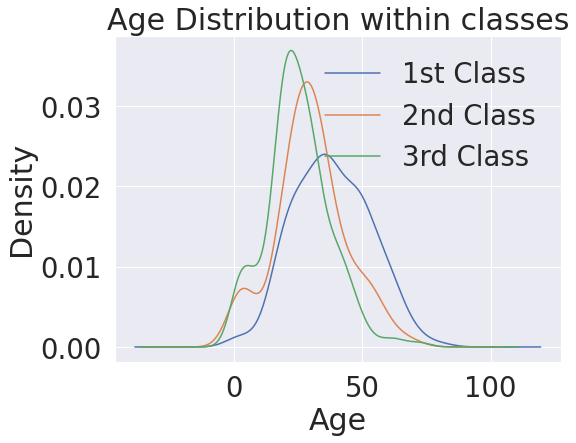

In [46]:
plt.figure(figsize=(8,6))
for i in range(1,4):
    df_train['Age'][df_train['Pclass']==i].plot(kind='kde')
plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class','2nd Class','3rd Class'])

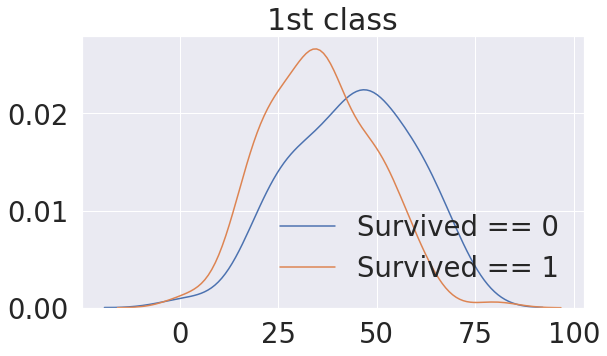

In [47]:
# Pclass = 1 인 탑승객들의 나이대별 생존자
fig, ax = plt.subplots(1,1,figsize=(9,5))
sns.kdeplot(df_train[(df_train['Survived']==0)&(df_train['Pclass']==1)]['Age'],ax=ax)
sns.kdeplot(df_train[(df_train['Survived']==1)&(df_train['Pclass']==1)]['Age'],ax=ax)
plt.legend(['Survived == 0','Survived == 1'])
plt.title('1st class')
plt.show()

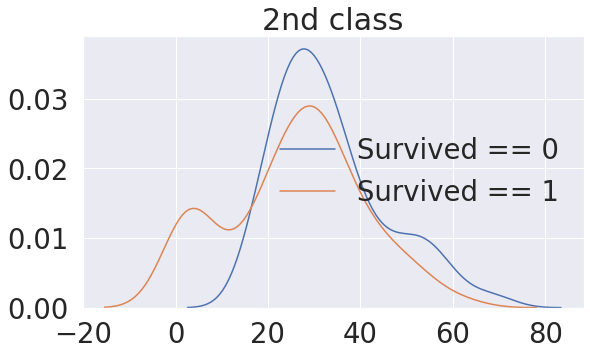

In [48]:
# Pclass = 2 인 사람들 중 나이대별 생존자
fig,ax = plt.subplots(1,1,figsize=(9,5))
sns.kdeplot(df_train[(df_train['Survived']==0) & (df_train['Pclass']==2)]['Age'],ax=ax)
sns.kdeplot(df_train[(df_train['Survived']==1) & (df_train['Pclass']==2)]['Age'],ax=ax)
plt.legend(['Survived == 0','Survived == 1'])
plt.title('2nd class')
plt.show()

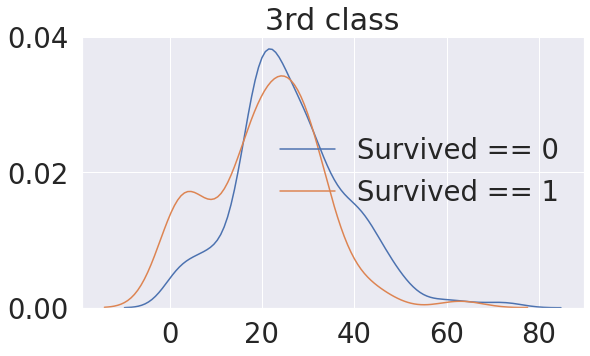

In [49]:
# Pclass = 3 인 사람들 중 나이대별 생존자
fig,ax = plt.subplots(1,1,figsize=(9,5))
sns.kdeplot(df_train[(df_train['Survived']==0) & (df_train['Pclass']==3)]['Age'],ax=ax)
sns.kdeplot(df_train[(df_train['Survived']==1) & (df_train['Pclass']==3)]['Age'],ax=ax)
plt.legend(['Survived == 0','Survived == 1'])
plt.title('3rd class')
plt.show()

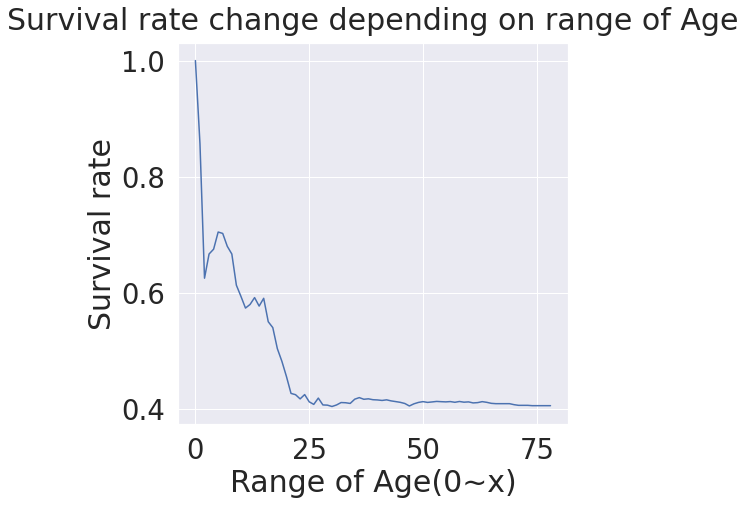

In [50]:
# age 의 ratio 를 다르게 했을 때 survival ratio 의 변화
change_age_range_survival_ratio = []
# append : 리스트에 요소 추가
for i in range(1,80):
    change_age_range_survival_ratio.append(df_train[df_train['Age']<i]['Survived'].sum()/len(df_train[df_train['Age']<i]['Survived']))
plt.figure(figsize=(7,7))
plt.plot(change_age_range_survival_ratio)
plt.title('Survival rate change depending on range of Age',y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

## Pclass, Sex, Age

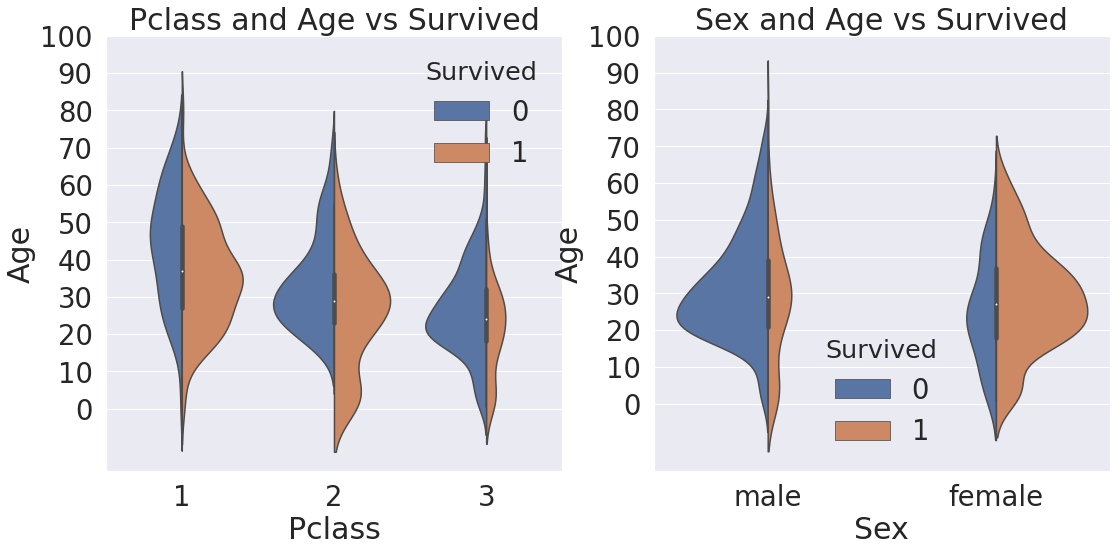

In [51]:
f, ax = plt.subplots(1,2,figsize=(18,8))
# split = false 0,1 따로 나눠서 표현
sns.violinplot('Pclass','Age',hue='Survived',data=df_train, scale='count',split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
# tick (0,110,10), 10: 나이를 10 단위로 끊어줌
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=df_train, scale='count', split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

## Embarked

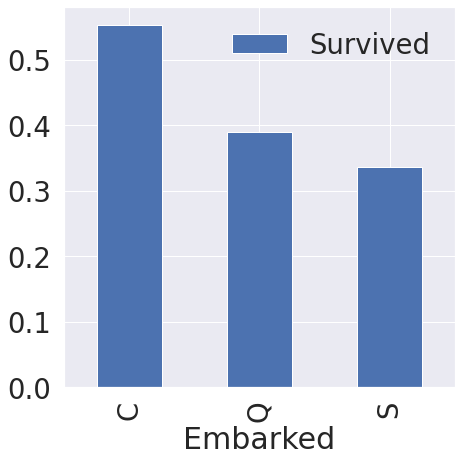

In [52]:
# sort_values : data frame 정렬
f, ax = plt.subplots(1, 1, figsize=(7, 7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

In [53]:
df_train[['Embarked','Survived']].groupby(['Embarked'],as_index=True).mean().sort_values(by='Survived',ascending=False)

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


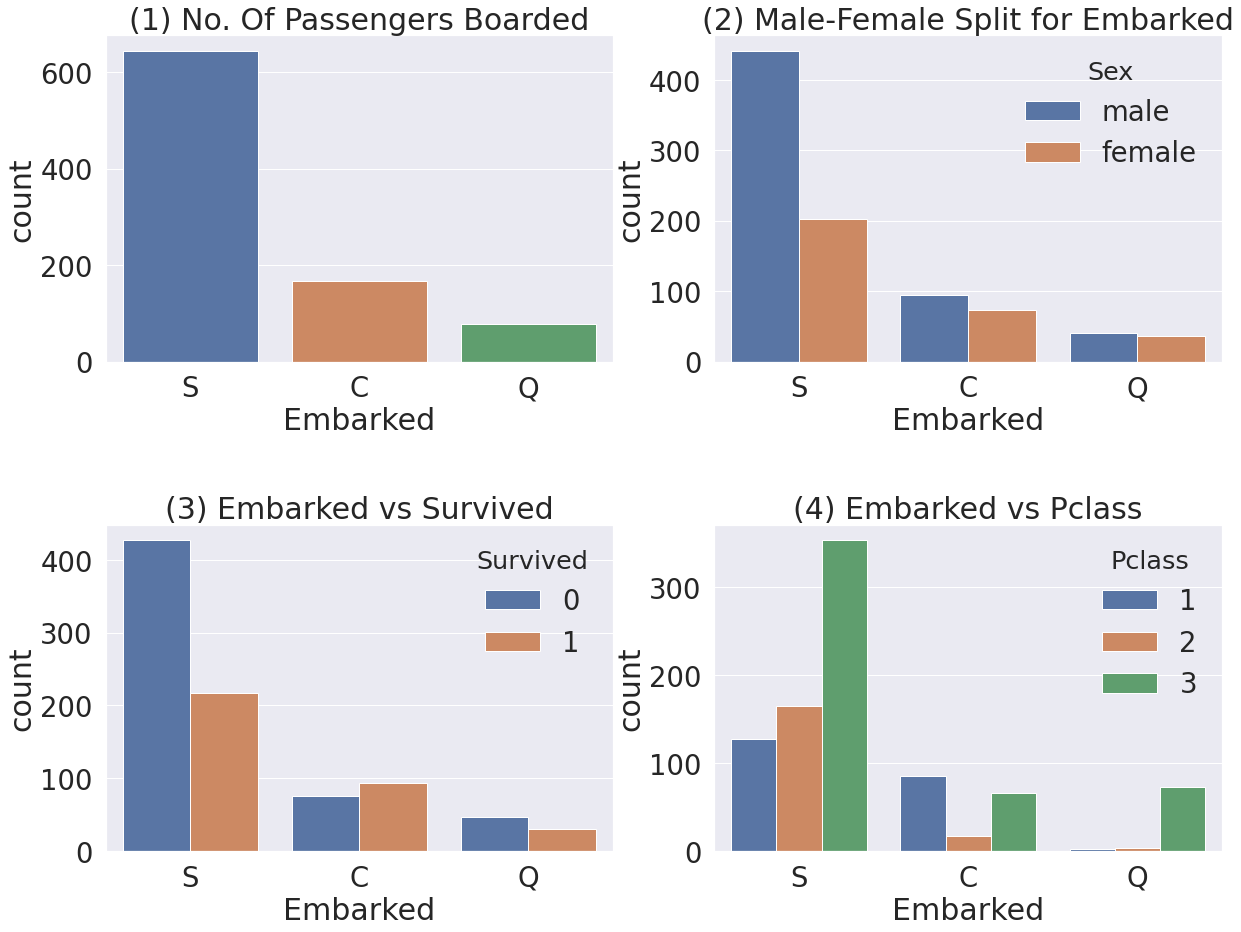

In [54]:
f,ax=plt.subplots(2, 2, figsize=(20,15))

sns.countplot('Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')

sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')

sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')

sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Family - SibSp + Parch

In [55]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1

In [61]:
print('Maximum size of Family:',df_train['FamilySize'].max())
print('Minimum size of Family:',df_train['FamilySize'].min())
print('Average size of Family:',df_train['FamilySize'].mean())

Maximum size of Family: 11
Minimum size of Family: 1
Average size of Family: 1.904601571268238


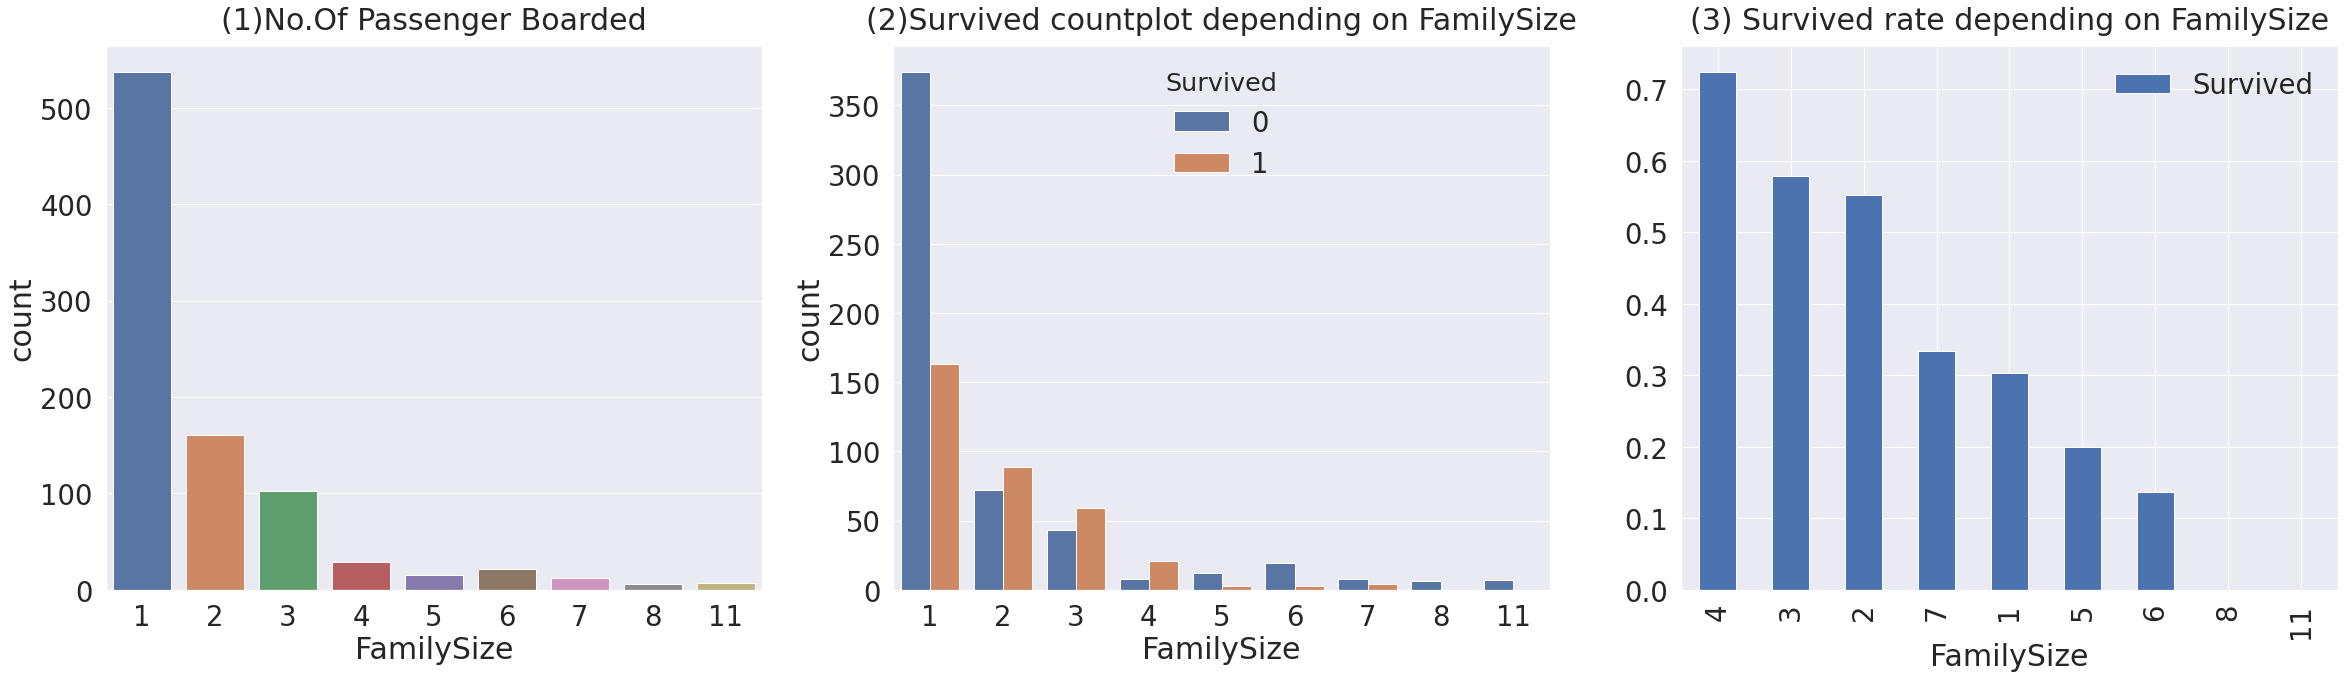

In [57]:
f, ax=plt.subplots(1,3,figsize=(40,10))
sns.countplot('FamilySize',data=df_train,ax=ax[0])
ax[0].set_title('(1)No.Of Passenger Boarded',y=1.02)

sns.countplot('FamilySize',hue='Survived',data=df_train, ax=ax[1])
ax[1].set_title('(2)Survived countplot depending on FamilySize', y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',  y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Fare

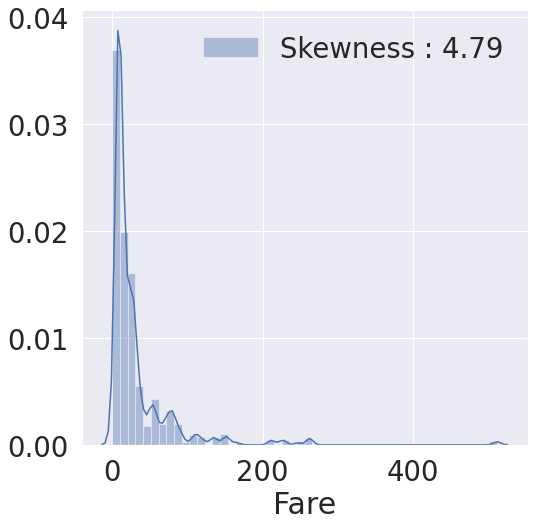

In [62]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

In [63]:
# testset 내의 nan value 를 평균값으로 치환
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()

# lambda 함수 -> log 값 취하기
df_train['Fare']=df_train['Fare'].map(lambda i: np.log(i) if i>0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

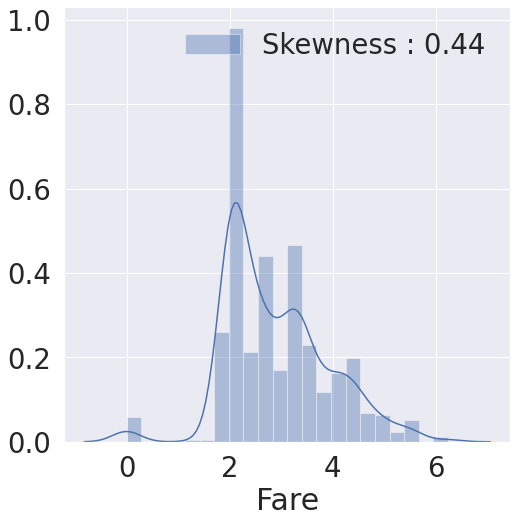

In [64]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

## 2.9 Cabin

In [65]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1


In [67]:
df_train['Ticket'].value_counts()

347082               7
1601                 7
CA. 2343             7
3101295              6
347088               6
                    ..
Fa 265302            1
STON/O 2. 3101293    1
323592               1
349231               1
SC/PARIS 2149        1
Name: Ticket, Length: 681, dtype: int64

In [68]:
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()

df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

## 3. Feature engineering

## 3.1 Fill Null

In [69]:
df_train['Initial']= df_train.Name.str.extract('([A-Za-z]+)\.')
    
df_test['Initial']= df_test.Name.str.extract('([A-Za-z]+)\.')

In [70]:
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [71]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

In [72]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,1.190112,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,1.085686,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,0.932798,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,1.207905,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,0.958425,1.222222


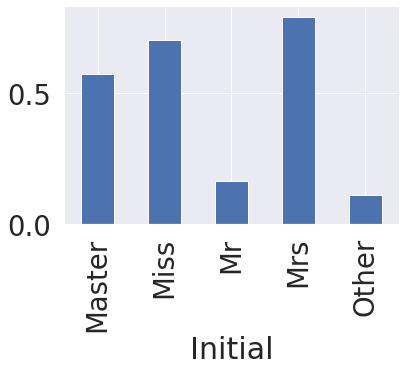

In [73]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

In [74]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,1.190112,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,1.085686,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,0.932798,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,1.207905,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,0.958425,1.222222


In [75]:
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'),'Age'] = 33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'),'Age'] = 36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'),'Age'] = 5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age'] = 22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'),'Age'] = 46

df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mr'),'Age'] = 33
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mrs'),'Age'] = 36
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Master'),'Age'] = 5
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Miss'),'Age'] = 22
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Other'),'Age'] = 46

In [76]:
print('Embarked has ', sum(df_train['Embarked'].isnull()), ' Null values')

Embarked has  2  Null values


In [77]:
df_train['Embarked'].fillna('S', inplace=True)

In [78]:
df_train['Age_cat'] = 0
df_train.loc[df_train['Age'] < 10, 'Age_cat'] = 0
df_train.loc[(10 <= df_train['Age']) & (df_train['Age'] < 20), 'Age_cat'] = 1
df_train.loc[(20 <= df_train['Age']) & (df_train['Age'] < 30), 'Age_cat'] = 2
df_train.loc[(30 <= df_train['Age']) & (df_train['Age'] < 40), 'Age_cat'] = 3
df_train.loc[(40 <= df_train['Age']) & (df_train['Age'] < 50), 'Age_cat'] = 4
df_train.loc[(50 <= df_train['Age']) & (df_train['Age'] < 60), 'Age_cat'] = 5
df_train.loc[(60 <= df_train['Age']) & (df_train['Age'] < 70), 'Age_cat'] = 6
df_train.loc[70 <= df_train['Age'], 'Age_cat'] = 7

df_test['Age_cat'] = 0
df_test.loc[df_test['Age'] < 10, 'Age_cat'] = 0
df_test.loc[(10 <= df_test['Age']) & (df_test['Age'] < 20), 'Age_cat'] = 1
df_test.loc[(20 <= df_test['Age']) & (df_test['Age'] < 30), 'Age_cat'] = 2
df_test.loc[(30 <= df_test['Age']) & (df_test['Age'] < 40), 'Age_cat'] = 3
df_test.loc[(40 <= df_test['Age']) & (df_test['Age'] < 50), 'Age_cat'] = 4
df_test.loc[(50 <= df_test['Age']) & (df_test['Age'] < 60), 'Age_cat'] = 5
df_test.loc[(60 <= df_test['Age']) & (df_test['Age'] < 70), 'Age_cat'] = 6
df_test.loc[70 <= df_test['Age'], 'Age_cat'] = 7

In [79]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7    
    
df_train['Age_cat_2'] = df_train['Age'].apply(category_age)

In [80]:
print('1번 방법, 2번 방법 둘다 같은 결과를 내면 True 줘야함 -> ', (df_train['Age_cat'] == df_train['Age_cat_2']).all())

1번 방법, 2번 방법 둘다 같은 결과를 내면 True 줘야함 ->  True


In [81]:
df_train.drop(['Age', 'Age_cat_2'], axis=1, inplace=True)
df_test.drop(['Age'], axis=1, inplace=True)

3.3 Change Initial, Embarked and Sex (string to numerical)

## 3.3 Change Initial, Embarked and Sex (string to numerical)

In [83]:
df_train['Initial'] = df_train['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})
df_test['Initial'] = df_test['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})

In [84]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [85]:
df_train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [88]:
df_train['Embarked'] = df_train['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df_test['Embarked'] = df_test['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [87]:
df_train['Embarked'].isnull().any()

False

In [89]:
df_train['Sex'] = df_train['Sex'].map({'female': 0, 'male': 1})
df_test['Sex'] = df_test['Sex'].map({'female': 0, 'male': 1})

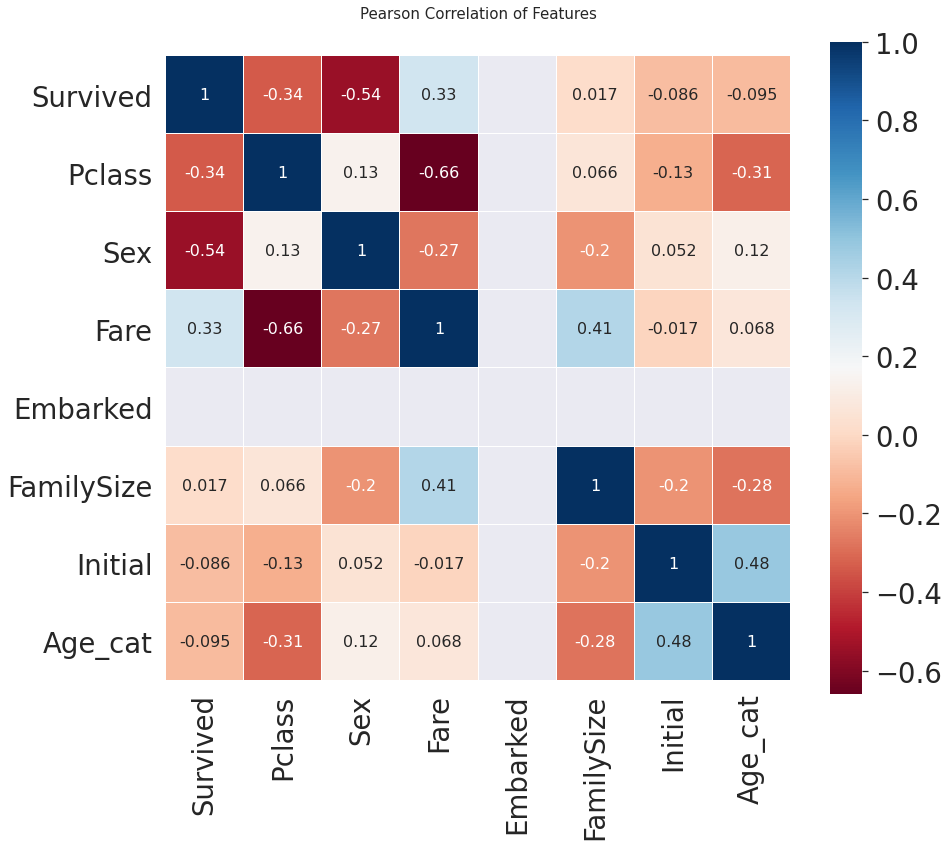

In [90]:
heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize', 'Initial', 'Age_cat']] 

colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})

del heatmap_data

In [91]:
df_train = pd.get_dummies(df_train, columns=['Initial'], prefix='Initial')
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix='Initial')

In [92]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,0.683603,NaN,NaN,2,2,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,1.450832,C85,NaN,2,3,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,0.727559,NaN,NaN,1,2,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,1.379314,C123,NaN,2,3,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,0.735091,NaN,NaN,1,3,0,0,1,0,0


In [93]:
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')

## 3.5 Drop columns

In [94]:
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name',  'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [95]:
df_train.head()

,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
0,0,3,1,0.683603,2,2,0,0,1,0,0
1,1,1,0,1.450832,2,3,0,0,0,1,0
2,1,3,0,0.727559,1,2,0,1,0,0,0
3,1,1,0,1.379314,2,3,0,0,0,1,0
4,0,3,1,0.735091,1,3,0,0,1,0,0


In [96]:
df_test.head()

,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
0,3,1,0.721667,1,3,0,0,1,0,0
1,3,0,0.665730,2,4,0,0,0,1,0
2,2,1,0.820148,1,6,0,0,1,0,0
3,3,1,0.769647,1,2,0,0,1,0,0
4,3,0,0.919718,3,2,0,0,0,1,0


## 4. Building machine learning model and prediction using the trained model

In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

## 4.1 Preparation - Split dataset into train, valid, test set

In [98]:
X_train = df_train.drop('Survived', axis=1).values
target_label = df_train['Survived'].values
X_test = df_test.values

In [99]:
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size=0.3, random_state=2018)

## 4.2 Model generation and prediction

In [100]:
model = RandomForestClassifier()
model.fit(X_tr, y_tr)
prediction = model.predict(X_vld)

In [101]:
print('총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'.format(y_vld.shape[0], 100 * metrics.accuracy_score(prediction, y_vld)))

총 268명 중 84.33% 정확도로 생존을 맞춤


## 4.3 Feature importance

In [102]:
from pandas import Series

feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index=df_test.columns)

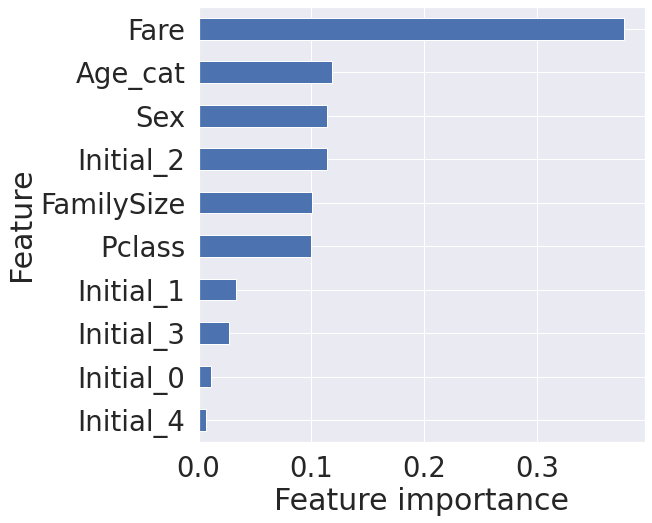

In [103]:
plt.figure(figsize=(8, 8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

## 4.4 Prediction on Test set

In [104]:
submission = pd.read_csv('../input/titanic/gender_submission.csv')

In [105]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [106]:
prediction = model.predict(X_test)
submission['Survived'] = prediction

In [ ]:
submission.to_csv('./my_first_submission.csv', index=False)